# Max Non Adjacent Sum

Given a list of integers, write a function that returns the largest sum of non-adjacent numbers. Numbers can be 0 or negative.

For example, [2, 4, 6, 2, 5] should return 13, since we pick 2, 6, and 5. [5, 1, 1, 5] should return 10, since we pick 5 and 5.

In [5]:
ip1=[2, 4, 6, 2, 5]

In [14]:
ip2=[5, 1, 1, 5]

In [11]:
def maxnonadsum(ip):
    if len(ip)==0:
        return 0
    else:
        incl=0
        excl=0
        for i in ip:
            new_incl=excl+i
            new_excl=max(incl,excl)
            
            excl=new_excl
            incl=new_incl
        return max(incl,excl)

In [15]:
maxnonadsum(ip2)

10

# Decodecount

Given the mapping a = 1, b = 2, ... z = 26, and an encoded message, count the number of ways it can be decoded.

For example, the message '111' would give 3, since it could be decoded as 'aaa', 'ka', and 'ak'.

You can assume that the messages are decodable. For example, '001' is not allowed.

In [17]:
ip=111
ip=str(ip)
ip[-2:0]

In [18]:
def decodecount(ip):
    n=len(str(ip))
    ip=str(ip)
    if n==0:
        return 0
    dp = [0]*(n+1)
    dp[0]=dp[1]=1
    for i in range(2,n+1):
        if 1 <= int(ip[i-1]) and int(ip[i-1]) <= 9:
            dp[i]=dp[i]+dp[i-1]
            #print(i,dp[i],dp[i-1])
        if 10<=int(ip[i-2:i])<=26:
            dp[i]=dp[i]+dp[i-2]
            #print(i,dp[i],dp[i-2])
    return dp[n]

In [19]:
decodecount(ip)

3

# count combinations

In [20]:
word_list = ["apple", "pen", "applepen", "pine", "pineapple","pin"]
original_string = "pineapplepenapple"

In [21]:
def count_combinations(original, words):
    memo = {}

    def helper(s):
        if s in memo:
            return memo[s]
        if not s:
            return 1

        count = 0
        for word in words:
            if s.startswith(word):
                count += helper(s[len(word):])
                print(word,s[len(word):])
        memo[s] = count
        return count

    return helper(original)

In [22]:
count_combinations(original_string,word_list)

apple 
pen apple
apple penapple
applepen apple
pine applepenapple
pineapple penapple
pin eapplepenapple


3

# Height volume

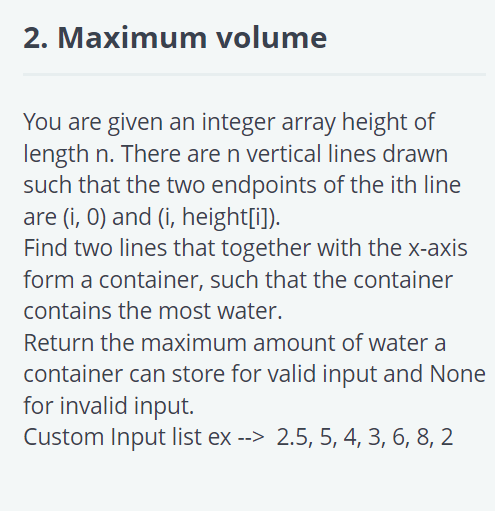

In [24]:
height_list=[5,3,6,3,9,3]

In [25]:
list = []
for i in range(len(height_list)):
    list.append([i+1,height_list[i]])
    print(list)     
pairs=[]
for i in range(len(list)):
    for j in range(i+1,len(list)):
        pairs.append([list[i],list[j]])
for i in range(len(pairs)):
    print(pairs[i],pairs[i][0],pairs[i][1],pairs[i][1][0]-pairs[i][0][0],min(pairs[i][1][1],pairs[i][0][1]),\
         (pairs[i][1][0]-pairs[i][0][0])*min(pairs[i][1][1],pairs[i][0][1]))
areas=[]
for i in range(len(pairs)):
    areas.append((pairs[i][1][0]-pairs[i][0][0])*min(pairs[i][1][1],pairs[i][0][1]))
    
areas.sort()

areas[len(areas)-1]

def maxvolume(height_list):
    list = []
    for i in range(len(height_list)):
        list.append([i+1,height_list[i]])
    pairs=[]
    for i in range(len(list)):
        for j in range(i+1,len(list)):
            pairs.append([list[i],list[j]])
    areas=[]
    for i in range(len(pairs)):
        areas.append((pairs[i][1][0]-pairs[i][0][0])*min(pairs[i][1][1],pairs[i][0][1]))
    areas.sort()
    return areas[len(areas)-1]

[[1, 5]]
[[1, 5], [2, 3]]
[[1, 5], [2, 3], [3, 6]]
[[1, 5], [2, 3], [3, 6], [4, 3]]
[[1, 5], [2, 3], [3, 6], [4, 3], [5, 9]]
[[1, 5], [2, 3], [3, 6], [4, 3], [5, 9], [6, 3]]
[[1, 5], [2, 3]] [1, 5] [2, 3] 1 3 3
[[1, 5], [3, 6]] [1, 5] [3, 6] 2 5 10
[[1, 5], [4, 3]] [1, 5] [4, 3] 3 3 9
[[1, 5], [5, 9]] [1, 5] [5, 9] 4 5 20
[[1, 5], [6, 3]] [1, 5] [6, 3] 5 3 15
[[2, 3], [3, 6]] [2, 3] [3, 6] 1 3 3
[[2, 3], [4, 3]] [2, 3] [4, 3] 2 3 6
[[2, 3], [5, 9]] [2, 3] [5, 9] 3 3 9
[[2, 3], [6, 3]] [2, 3] [6, 3] 4 3 12
[[3, 6], [4, 3]] [3, 6] [4, 3] 1 3 3
[[3, 6], [5, 9]] [3, 6] [5, 9] 2 6 12
[[3, 6], [6, 3]] [3, 6] [6, 3] 3 3 9
[[4, 3], [5, 9]] [4, 3] [5, 9] 1 3 3
[[4, 3], [6, 3]] [4, 3] [6, 3] 2 3 6
[[5, 9], [6, 3]] [5, 9] [6, 3] 1 3 3


In [26]:
maxvolume(height_list)

20

### Optimisation

Given the dimensions of cylindrical water tank, spherical solid balls and the amount of water present in the tank check if water tank will overflow when balls are dipped in the water tank. <br>
input : H = 10, r =  5
        h = 5
        N = 2, R = 2

In [28]:
def overflow(H,r,h,N,R):
    cylinder_volume=3.14*r*r*H
    water_volume=3.14*r*r*h
    ball_volume=N*3.14*R*R*R*(4/3)
    if cylinder_volume-(water_volume+ball_volume)>0:
        return 'No'
    else:
        return 'Yes'

In [29]:
overflow(10,5,5,2,2)

'No'

# Kedane's Algorithm

In [30]:
A=[-2, -3, 4, -1, -2, 1, 5, -3]

In [31]:
def kedane(a):
    max_local=max_global=A[0]
    start=0
    end=0
    s=0
    for i in range(1,len(A)):
        max_local=max(max_local+A[i],A[i])
        if max_local>max_global:
            max_global=max_local
    return max_global

In [32]:
kedane(A)

7

In [33]:
def kedane(A):
    max_local = max_global = A[0]
    start = end = 0
    temp_start = 0  # Temporary start index for current max_local
    for i in range(1, len(A)):
        if A[i] > max_local + A[i]:
            temp_start = i
            max_local = A[i]
        else:
            max_local=max_local+ A[i]

        if max_local > max_global:
            max_global = max_local
            start = temp_start
            end = i
        print('i='+str(i),'A[i]='+str(A[i]),'max_local='+str(max_local),'max_global='+str(max_global),'temp_start='+str(temp_start),'start='+str(start),'end='+str(end))

    return max_global, start, end

In [34]:
kedane(A)

i=1 A[i]=-3 max_local=-3 max_global=-2 temp_start=1 start=0 end=0
i=2 A[i]=4 max_local=4 max_global=4 temp_start=2 start=2 end=2
i=3 A[i]=-1 max_local=3 max_global=4 temp_start=2 start=2 end=2
i=4 A[i]=-2 max_local=1 max_global=4 temp_start=2 start=2 end=2
i=5 A[i]=1 max_local=2 max_global=4 temp_start=2 start=2 end=2
i=6 A[i]=5 max_local=7 max_global=7 temp_start=2 start=2 end=6
i=7 A[i]=-3 max_local=4 max_global=7 temp_start=2 start=2 end=6


(7, 2, 6)

# Longest palindromic substring

In [35]:
def strfunc(a):
    lst=[]
    for i in range(len(a)):
        for j in range(i,len(a)+1):
            if a[i:j]==a[i:j][::-1] and len(a[i:j])>0:
                lst.append(a[i:j])
    #print(lst)
    x=lst[0]
    for i in range(1,len(lst)):
        #print(lst[i])
        if len(lst[i])>len(x):
            x=lst[i]

    print('x is ',x)

In [36]:
def palfun(a):
    res=""
    reslen=0
    for i in range(len(a)):
        l,r=i,i
        while l>=0 and r<len(a) and a[l]==a[r]:
            if (r-l+1)>reslen:
                res=a[l:r+1]
                reslen=r-l+1
            print(i,r,l,a[l:r+1])
            l=l-1
            r=r+1
        #print(reslen)
        l,r=i,i+1
        while l>=0 and r<len(a) and a[l]==a[r]:
            if (r-l+1)>reslen:
                res=a[l:r+1]
                reslen=r-l+1
            print(i,l,r,a[l:r+1])
            l=l-1
            r=r+1
    return res

# Product of list except i

In [37]:
def prodxcpt(lst):
    res=[]
    prod=1
    for i in lst:
        prod=prod*i
    for i in lst:
        res.append(prod/i)
    return res

In [38]:
prodxcpt([1, 2, 3, 4, 5])

[120.0, 60.0, 40.0, 30.0, 24.0]

In [39]:
def prodxcpt(lst):
    res=[]
    for i in range(len(lst)):
        temp_lst=lst[:i] + lst[i+1 :]
        #print(temp_lst)
        prod=1
        for j in temp_lst:
            prod=prod*j
        res.append(prod)
    return res

In [40]:
prodxcpt([1, 2, 3, 4, 5])

[120, 60, 40, 30, 24]

In [41]:
def prdxcptn(lst):
    n=len(lst)
    res=[1]*n
    left=[1]*n
    right=[1]*n
    for i in range(1,n):
        left[i]=left[i-1]*lst[i-1]
    for i in range(n-2,-1,-1):
        right[i]=right[i+1]*lst[i+1]
    for i in range(n):
        res[i]=left[i]*right[i]
    print(left)
    print(right)
    return res

In [42]:
prdxcptn([1, 2, 3, 4, 5])

[1, 1, 2, 6, 24]
[120, 60, 20, 5, 1]


[120, 60, 40, 30, 24]

# Steps

There exists a staircase with N steps, and you can climb up either 1 or 2 steps at a time. Given N, write a function that returns the number of unique ways you can climb the staircase. The order of the steps matters.

For example, if N is 4, then there are 5 unique ways:

1, 1, 1, 1
2, 1, 1
1, 2, 1
1, 1, 2
2, 2
What if, instead of being able to climb 1 or 2 steps at a time, you could climb any number from a set of positive integers X? For example, if X = {1, 3, 5}, you could climb 1, 3, or 5 steps at a time.

In [1]:
def stairs(n):
    if n == 0:
        return 0
    elif n==1:
        return 1
    elif n==2:
        return 2
    else:
        return stairs(n-1)+stairs(n-2)

In [2]:
stairs(4)

5

# String Manipulation

Given an integer k and a string s, find the length of the longest substring that contains at most k distinct characters.

For example, given s = "abcba" and k = 2, the longest substring with k distinct characters is "bcb".

In [4]:
def lssub(string,k):
    sub=[]
    n=len(string)
    for i in range(n):
        for j in range(i+1,n+1):
            sub.append(string[i:j])
    usub={}
    for i in sub:
        usub[i]=''.join(set(i))
    flst=[]
    for i in usub:
        if len(usub[i])==k:
            flst.append(i)
    return max(flst, key=len)


In [5]:
lssub('abcba',2)

'bcb'